In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import matplotlib.pyplot as plt

#load mnist data and preprocess into training and testing set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

#reshape iamges to fit cnn input layer = BATCH SIZE, HEIGHT, WIDTH, CHANNELS
x_train_cnn = x_train.reshape(60000, 28, 28, 1)
x_test_cnn = x_test.reshape(10000, 28, 28, 1)

print("Data loaded and preprocessed successfully!")
print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

Data loaded and preprocessed successfully!
Training samples: 60000, Test samples: 10000


In [ ]:
# CNN Model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #num filters, kernel size, activation fn, minput_shape
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training CNN...")
history_cnn = cnn.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=128, 
                      validation_data=(x_test_cnn, y_test_cat), verbose=1)
cnn_acc = cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)[1]
print(f"\nCNN Test Accuracy: {cnn_acc:.4f}")

Training CNN...
Epoch 1/10
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.9499 - loss: 0.1654 - val_accuracy: 0.9810 - val_loss: 0.0597
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.9499 - loss: 0.1654 - val_accuracy: 0.9810 - val_loss: 0.0597
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9850 - loss: 0.0484 - val_accuracy: 0.9853 - val_loss: 0.0415
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9850 - loss: 0.0484 - val_accuracy: 0.9853 - val_loss: 0.0415
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9900 - loss: 0.0324 - val_accuracy: 0.9890 - val_loss: 0.0324
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9900 - loss: 0.0324 - val_accuracy: 0.9890 - val_loss: 0.0324
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9888 - val_loss: 0.0357
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accurac

In [ ]:
# MLP Model Builder Function
def build_mlp(activation='relu', optimizer='sgd', bn=True, dropout=0.0):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256),
        layers.BatchNormalization() if bn else layers.Lambda(lambda x: x),
        layers.Activation(activation),
        layers.Dropout(dropout) if dropout > 0 else layers.Lambda(lambda x: x),
        layers.Dense(128),
        layers.BatchNormalization() if bn else layers.Lambda(lambda x: x),
        layers.Activation(activation),
        layers.Dense(10, activation='softmax')
    ])
    
    opt = {'sgd': SGD(0.01), 'momentum': SGD(0.01, momentum=0.9), 'adam': Adam()}[optimizer]
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train MLP with different configurations
mlp1 = build_mlp('relu', 'sgd', bn=True)
print("Training MLP-1 (ReLU + SGD + BN)...")
history_mlp1 = mlp1.fit(x_train, y_train_cat, epochs=15, batch_size=128, validation_data=(x_test, y_test_cat), verbose=0)
mlp1_acc = mlp1.evaluate(x_test, y_test_cat, verbose=0)[1]
print(f"MLP-1 Test Accuracy: {mlp1_acc:.4f}")

mlp2 = build_mlp('relu', 'adam', bn=False)
print("\nTraining MLP-2 (ReLU + Adam, no BN)...")
history_mlp2 = mlp2.fit(x_train, y_train_cat, epochs=15, batch_size=128, validation_data=(x_test, y_test_cat), verbose=0)
mlp2_acc = mlp2.evaluate(x_test, y_test_cat, verbose=0)[1]
print(f"MLP-2 Test Accuracy: {mlp2_acc:.4f}")

/home/deeraj/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training MLP-1 (ReLU + SGD + BN)...
MLP-1 Test Accuracy: 0.9710

Training MLP-2 (ReLU + Adam, no BN)...
MLP-1 Test Accuracy: 0.9710

Training MLP-2 (ReLU + Adam, no BN)...
MLP-2 Test Accuracy: 0.9739
MLP-2 Test Accuracy: 0.9739


In [ ]:
#Comparison Experiments
experiments = [
    ("Sigmoid", "sgd", True, 0.0),
    ("Tanh", "sgd", True, 0.0),
    ("ReLU", "sgd", True, 0.0),
    ("ReLU", "momentum", True, 0.0),
    ("ReLU", "adam", True, 0.0),
    ("ReLU", "adam", False, 0.0),
    ("ReLU", "adam", True, 0.25),
]

results = []
histories = []

for act, opt, bn, dr in experiments:
    print(f"Training: {act} + {opt.upper()}, BN={bn}, Dropout={dr}")
    model = build_mlp(activation=act.lower(), optimizer=opt, bn=bn, dropout=dr)
    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128,
                       validation_data=(x_test, y_test_cat), verbose=0)
    acc = model.evaluate(x_test, y_test_cat, verbose=0)[1]
    results.append([act, opt.upper(), bn, dr, f"{acc:.4f}"])
    histories.append(history)

df = pd.DataFrame(results, columns=["Activation", "Optimizer", "BatchNorm", "Dropout", "Accuracy"])
print("\n" + "="*60)
print("COMPARISON TABLE")
print("="*60)
print(df.to_string(index=False))

Training: Sigmoid + SGD, BN=True, Dropout=0.0
Training: Tanh + SGD, BN=True, Dropout=0.0
Training: Tanh + SGD, BN=True, Dropout=0.0
Training: ReLU + SGD, BN=True, Dropout=0.0
Training: ReLU + SGD, BN=True, Dropout=0.0
Training: ReLU + MOMENTUM, BN=True, Dropout=0.0
Training: ReLU + MOMENTUM, BN=True, Dropout=0.0
Training: ReLU + ADAM, BN=True, Dropout=0.0
Training: ReLU + ADAM, BN=True, Dropout=0.0
Training: ReLU + ADAM, BN=False, Dropout=0.0
Training: ReLU + ADAM, BN=False, Dropout=0.0
Training: ReLU + ADAM, BN=True, Dropout=0.25
Training: ReLU + ADAM, BN=True, Dropout=0.25

COMPARISON TABLE
Activation Optimizer  BatchNorm  Dropout Accuracy
   Sigmoid       SGD       True     0.00   0.9141
      Tanh       SGD       True     0.00   0.9451
      ReLU       SGD       True     0.00   0.9658
      ReLU  MOMENTUM       True     0.00   0.9793
      ReLU      ADAM       True     0.00   0.9810
      ReLU      ADAM      False     0.00   0.9802
      ReLU      ADAM       True     0.25   0.9810


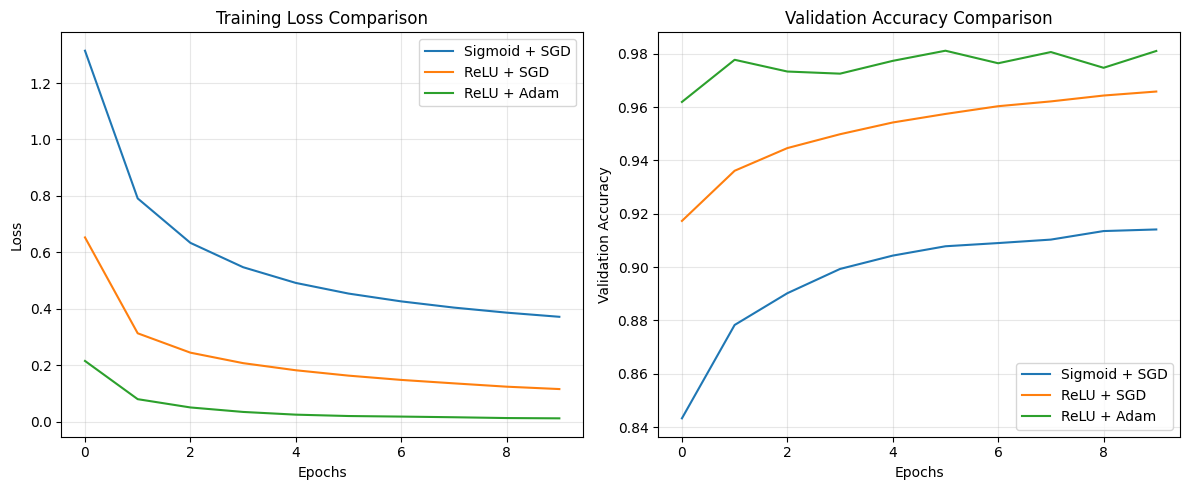

In [6]:
# Visualize Training Loss Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(histories[0].history['loss'], label='Sigmoid + SGD')
plt.plot(histories[2].history['loss'], label='ReLU + SGD')
plt.plot(histories[4].history['loss'], label='ReLU + Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Comparison')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(histories[0].history['val_accuracy'], label='Sigmoid + SGD')
plt.plot(histories[2].history['val_accuracy'], label='ReLU + SGD')
plt.plot(histories[4].history['val_accuracy'], label='ReLU + Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()